# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')
# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.info()
azdias.head(5)
azdias.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
891216,-1,3,2,5.0,1,4,2,5,4,4,...,3.0,2.0,0.0,0.0,1.0,2.0,3.0,NaN,NaN,NaN
891217,-1,2,1,4.0,3,3,3,2,2,3,...,1.0,3.0,3.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0
891218,-1,2,2,4.0,2,4,2,5,4,3,...,4.0,2.0,0.0,0.0,1.0,3.0,4.0,2.0,2.0,3.0
891219,-1,1,1,3.0,1,5,3,5,5,5,...,1.0,4.0,3.0,1.0,5.0,1.0,1.0,4.0,7.0,5.0
891220,-1,4,1,1.0,4,2,5,2,1,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,4.0,5.0


In [4]:
feat_info.info()

feat_info.head(5)

feat_info.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


,attribute,information_level,type,missing_or_unknown
80,PLZ8_HHZ,macrocell_plz8,ordinal,[-1]
81,PLZ8_GBZ,macrocell_plz8,ordinal,[-1]
82,ARBEIT,community,ordinal,"[-1,9]"
83,ORTSGR_KLS9,community,ordinal,"[-1,0]"
84,RELAT_AB,community,ordinal,"[-1,9]"


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [5]:
# Identify missing or unknown data values and convert them to NaNs.

azdias.isnull().sum()

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [6]:
azdias['AGER_TYP'].isnull().sum()

0

In [7]:
# Find out the columns from azdias dataset that have non 0 values and group using value_counts function
azdias.isnull().sum()

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [8]:
# Find out the encoded value types for the 'missing or unknown' from feat_info dataset and group using value_counts() function
feat_info['missing_or_unknown'].value_counts()

[-1]        26
[-1,9]      17
[-1,0]      16
[0]         12
[]          10
[XX]         1
[-1,0,9]     1
[-1,XX]      1
[-1,X]       1
Name: missing_or_unknown, dtype: int64

In [9]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [10]:
#feat_info_onehotencoded = pd.concat([feat_info,pd.get_dummies(feat_info['missing_or_unknown'])],axis=1)

In [11]:
#feat_info_onehotencoded.drop(columns = ['missing_or_unknown'], axis = 1, inplace = True)

In [12]:
for index in feat_info.index:
    feat_info.loc[index,'missing_or_unknown'] = feat_info.loc[index,'missing_or_unknown'].strip('[]').split(',')
    for i in range(len(feat_info.loc[index,'missing_or_unknown'])):
        try:
            feat_info.loc[index,'missing_or_unknown'][i] = int(feat_info.loc[index,'missing_or_unknown'][i])
        except:
            continue
    azdias.loc[:,(feat_info.loc[index, 'attribute'])].replace(feat_info.loc[index,'missing_or_unknown'], np.nan, inplace=True)

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [13]:
nan_count = np.asarray(azdias.isna().sum().tolist())
array = np.array(nan_count)
array
missing_df = pd.DataFrame(data=nan_count.flatten())
missing_df

,0
0,685843
1,2881
2,0
3,4854
4,0
5,0
6,0
7,0
8,0
9,0


In [14]:
azdias_transposed = azdias.transpose()
azdias_transposed

,0,1,2,3,4,5,6,7,8,9,...,891211,891212,891213,891214,891215,891216,891217,891218,891219,891220
AGER_TYP,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,...,3,4,4,1,2,3,2,2,1,4
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,...,1,1,2,2,2,2,1,2,1,1
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4,...,2,1,5,4,6,5,4,4,3,1
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,...,3,3,3,1,1,1,3,2,1,4
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,...,2,1,3,5,5,4,3,4,5,2
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,...,4,5,3,2,2,2,3,2,3,5
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,...,3,1,5,3,4,5,2,5,5,2
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,...,3,1,3,3,5,4,2,4,5,1
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,...,2,5,2,4,4,4,3,3,5,5


In [15]:
missing_df.columns=['X']
res = azdias_transposed.reset_index().join(missing_df.reset_index(), rsuffix='_r')[['index', 'X']].set_index('index')
print(res)

                            X
index                        
AGER_TYP               685843
ALTERSKATEGORIE_GROB     2881
ANREDE_KZ                   0
CJT_GESAMTTYP            4854
FINANZ_MINIMALIST           0
FINANZ_SPARER               0
FINANZ_VORSORGER            0
FINANZ_ANLEGER              0
FINANZ_UNAUFFAELLIGER       0
FINANZ_HAUSBAUER            0
FINANZTYP                   0
GEBURTSJAHR            392318
GFK_URLAUBERTYP          4854
GREEN_AVANTGARDE            0
HEALTH_TYP             111196
LP_LEBENSPHASE_FEIN     97632
LP_LEBENSPHASE_GROB     94572
LP_FAMILIE_FEIN         77792
LP_FAMILIE_GROB         77792
LP_STATUS_FEIN           4854
LP_STATUS_GROB           4854
NATIONALITAET_KZ       108315
PRAEGENDE_JUGENDJAHRE  108164
RETOURTYP_BK_S           4854
SEMIO_SOZ                   0
SEMIO_FAM                   0
SEMIO_REL                   0
SEMIO_MAT                   0
SEMIO_VERT                  0
SEMIO_LUST                  0
...                       ...
OST_WEST_K

In [16]:
res.columns = ["missing_values"]
res

,missing_values
index,
AGER_TYP,685843
ALTERSKATEGORIE_GROB,2881
ANREDE_KZ,0
CJT_GESAMTTYP,4854
FINANZ_MINIMALIST,0
FINANZ_SPARER,0
FINANZ_VORSORGER,0
FINANZ_ANLEGER,0
FINANZ_UNAUFFAELLIGER,0


In [17]:
res

,missing_values
index,
AGER_TYP,685843
ALTERSKATEGORIE_GROB,2881
ANREDE_KZ,0
CJT_GESAMTTYP,4854
FINANZ_MINIMALIST,0
FINANZ_SPARER,0
FINANZ_VORSORGER,0
FINANZ_ANLEGER,0
FINANZ_UNAUFFAELLIGER,0


In [18]:
del res.index.name

In [19]:
res

,missing_values
AGER_TYP,685843
ALTERSKATEGORIE_GROB,2881
ANREDE_KZ,0
CJT_GESAMTTYP,4854
FINANZ_MINIMALIST,0
FINANZ_SPARER,0
FINANZ_VORSORGER,0
FINANZ_ANLEGER,0
FINANZ_UNAUFFAELLIGER,0
FINANZ_HAUSBAUER,0


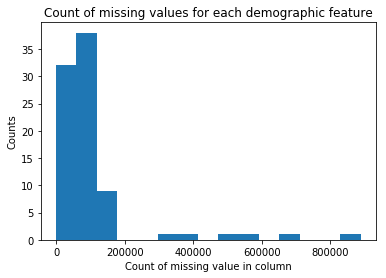

In [20]:
# Percentage of missing values using histogram
plt.hist(res.missing_values, bins=15, alpha=1)
plt.xlabel('Count of missing value in column')
plt.ylabel('Counts')
plt.title('Count of missing values for each demographic feature')
plt.show()

**Observation** - The above histogram states the count of missing values in the columns. There are around 6 columns that contain more than 180000 of missing values and are likely to been seen as Outliers. 

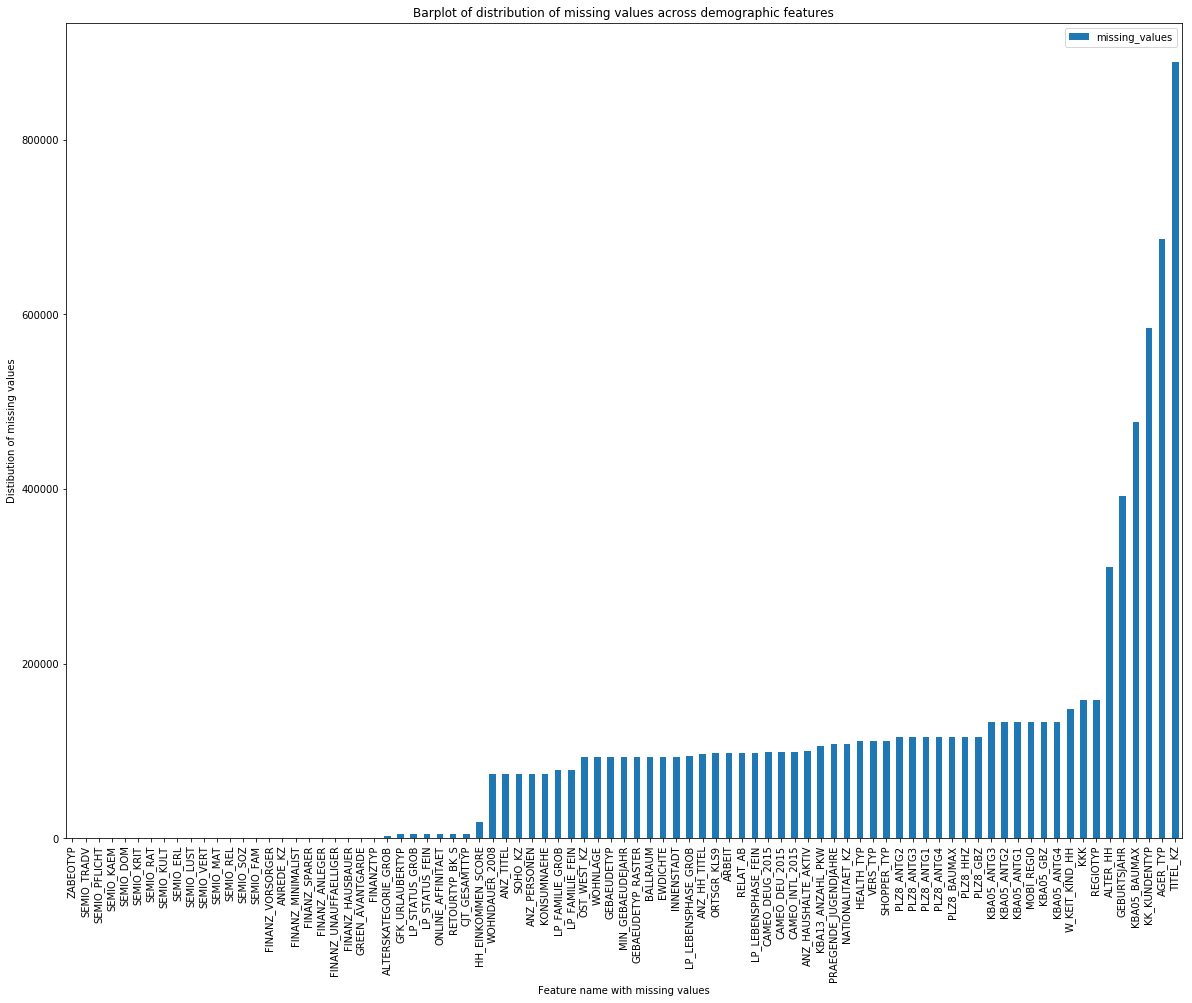

There are 61 columns with missing values.


In [21]:
missing_columns = res.query("missing_values != 0")

res.sort_values(by='missing_values',ascending=True).plot(kind='bar',stacked=True, figsize = (20,15))
plt.xlabel('Feature name with missing values')
plt.ylabel('Distibution of missing values')
plt.title('Barplot of distribution of missing values across demographic features')
plt.show()

print("There are {} columns with missing values.".format(len(missing_columns)))

**Observation** - We see there are total of 61 columns that contain missing values out of original 85 columns in the dataset.

In [22]:
# Perform an assessment of how much missing data there is in each column of the dataset by finding out outliers 
nan_count = np.asarray(azdias.isna().sum().tolist())
nan_mid = np.median(nan_count)
low_mid = np.median(nan_count[nan_count < nan_mid])
high_mid = np.median(nan_count[nan_count > nan_mid])
print("Higher side of the median missing value count is {}".format(low_mid))
print("Higher side of the median missing value count is {}".format(high_mid))
iqr = high_mid - low_mid
print("Interquartile range is {}".format(iqr))
outliers = [low_mid - 1.5*iqr, high_mid + 1.5*iqr]

Higher side of the median missing value count is 0.0
Higher side of the median missing value count is 116515.0
Interquartile range is 116515.0


In [23]:
# Remove the outlier columns from the dataset. (You'll perform other data engineering tasks such as re-encoding and imputation later.)
# Determine which columns have enough NaN to be considered outliers

keep_columns = []
outlier_columns =[]
for column in azdias.columns:
    if outliers[0] < azdias[column].isna().sum() < outliers[1]:
        keep_columns.append(column)
    else:
        outlier_columns.append(column)

In [24]:
outlier_columns

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

In [25]:
keep_columns

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER',
 'FINANZ_VORSORGER',
 'FINANZ_ANLEGER',
 'FINANZ_UNAUFFAELLIGER',
 'FINANZ_HAUSBAUER',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'HEALTH_TYP',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'PRAEGENDE_JUGENDJAHRE',
 'RETOURTYP_BK_S',
 'SEMIO_SOZ',
 'SEMIO_FAM',
 'SEMIO_REL',
 'SEMIO_MAT',
 'SEMIO_VERT',
 'SEMIO_LUST',
 'SEMIO_ERL',
 'SEMIO_KULT',
 'SEMIO_RAT',
 'SEMIO_KRIT',
 'SEMIO_DOM',
 'SEMIO_KAEM',
 'SEMIO_PFLICHT',
 'SEMIO_TRADV',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'HH_EINKOMMEN_SCORE',
 'W_KEIT_KIND_HH',
 'WOHNDAUER_2008',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'GEBAEUDETYP',
 'KONSUMNAEHE',
 'MIN_GEBAEUDEJAHR',
 'OST_WEST_KZ',
 'WOHNLAGE',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'CAMEO_INTL_2015',
 'KBA05_ANTG1',
 'K

In [26]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 205378 non-null float64
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              498903 non-null float64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
LP_FAMILIE_FEIN          813429 non-null float64
LP_FAMILIE_GROB          

In [27]:
# How much data is missing in each row of the dataset?
drop_columns = ['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']
# Drop the columns in the demographic dataframe - azdias (columns that were identified as outlier columns)
azdias.drop(drop_columns, axis='columns', inplace = True)

In [28]:
drop_columns

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX']

**Observation** - The columns named as 'AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'ALTER_HH', 'KK_KUNDENTYP', 'KBA05_BAUMAX' had more than 180000 missing values.AS was seen in the first graph, they are safely outliers and as a part of this project, they can be dropped

#### Discussion 1.1.2: Assess Missing Data in Each Column

**Observation** - 6 of the 85 rows were determiend as outliers are dropped from the dataframe
Columns removed from dataframe are:

AGER_TYP

GEBURTSJAHR

TITEL_KZ

ALTER_HH

KK_KUNDENTYP

KBA05_BAUMAX

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [29]:
# After dropping 6 columns from azdias - demographics table, compute to find the number of missing values 
print(sum(azdias.isnull().any(axis = 1)))

268012


**Observations** -  Total of 268012 rows contains 1 or more missing values out of 891221 observations. That means 30% of our observations (rows) have any sort of missing values.

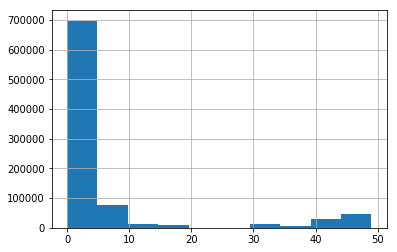

In [30]:
# For analysing missing data in each row
azdias.isnull().sum(axis=1).sort_values(ascending=False).hist()

**Observation** - Based on the above graph, we can keep 25 as the limit, for breaking the dataframe into 2 subplots

In [31]:
nan_count_row = azdias.isnull().transpose().sum()

In [32]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
upper_limit = azdias[nan_count_row >25]
num_missing_upper = upper_limit.isnull().transpose().sum()

In [33]:
upper_limit.transpose().index

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

In [34]:
# Repeat for the other half
lower_limit = azdias[nan_count_row <=25]
num_missing_lower = lower_limit.isnull().transpose().sum()

In [35]:
lower_limit.transpose().index

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

**Observation** - Note, division the dataframe is done on rows whose total # of missing values is <=25 OR > 25. IN both subsets of dataframe, all the 61 index values i.e. features remain intact. This will be useful for doing a comparsion on the subplot

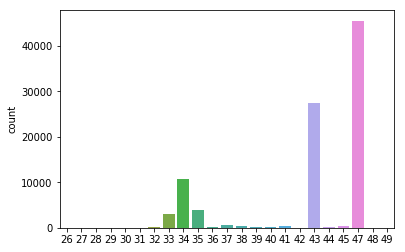

In [36]:
# Plot code frequency using countplot for the features with missing # of values greater than threshold
sns.countplot(upper_limit.isnull().transpose().sum())

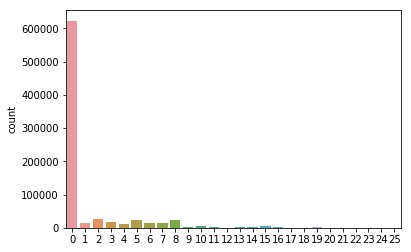

In [37]:
sns.countplot(lower_limit.isnull().transpose().sum())

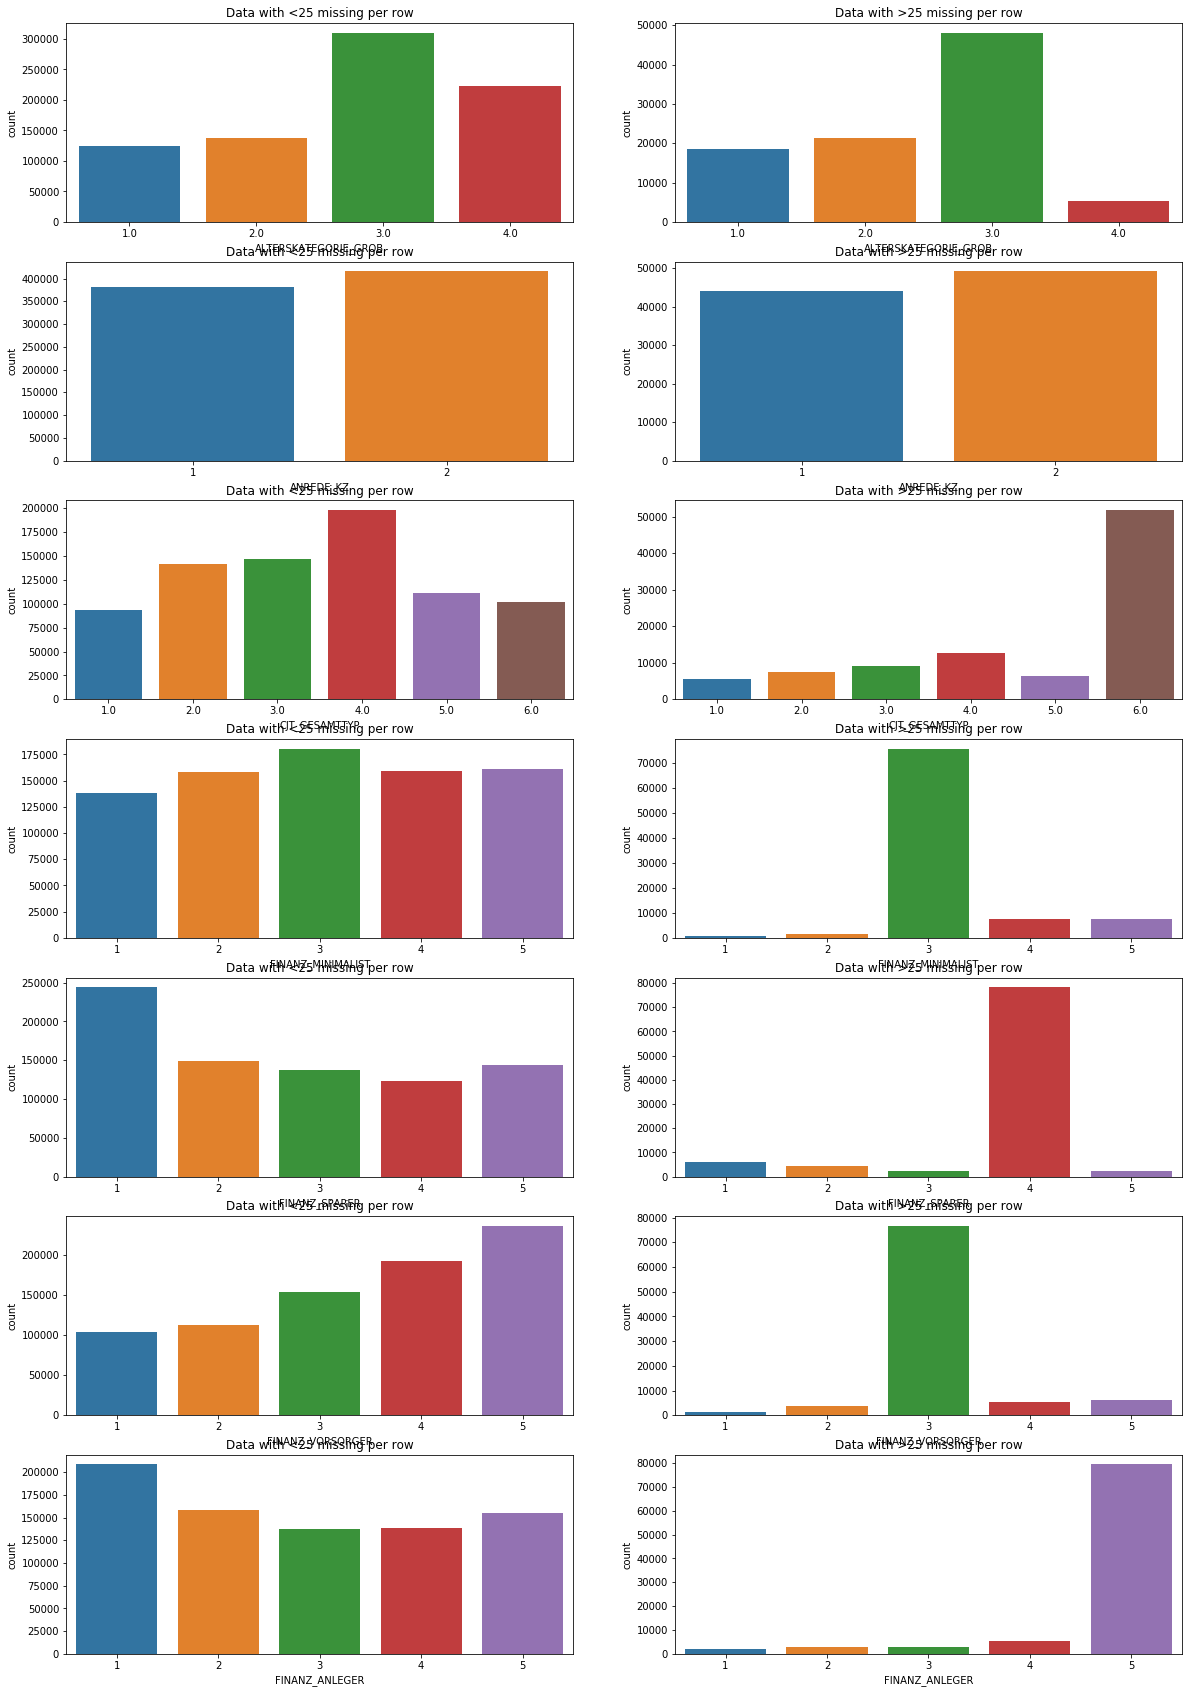

In [38]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20,30))
i = 0

for column in azdias.columns[0:7]:
    sns.countplot(lower_limit.loc[:, column], ax=axes[i,0])
    axes[i,0].set_title('Data with <25 missing per row')
    sns.countplot(upper_limit.loc[:, column], ax=axes[i,1])
    axes[i,1].set_title('Data with >25 missing per row')
    i+=1

In [39]:
upper_limit.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1,2.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2.0,1,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,3.0,1,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2.0,1,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,3.0,2,6.0,3,4,3,5,5,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
lower_limit.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [41]:
azdias_lower_missing = lower_limit

In [42]:
azdias_lower_missing

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,2.0,2,5.0,1,5,1,5,4,3,4,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,1.0,1,3.0,3,3,4,1,3,2,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,3.0,1,3.0,4,4,2,4,2,2,6,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,3.0,2,4.0,2,4,2,3,5,4,1,...,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0
10,3.0,2,1.0,2,2,5,3,1,5,6,...,2.0,4.0,2.0,0.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Discussion 1.1.3: Assess Missing Data in Each Row

The data with lots of missing values has different distribution that for data with few or no missing values which are more similarly distributed. For the sake of that reason, we will proceed with data that have missing value count of <=25, which is called azdias_lower_missing

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [43]:
# How many features are there of each data type?
feat_info.groupby('type').count()

,attribute,information_level,missing_or_unknown
type,,,
categorical,21,21,21
interval,1,1,1
mixed,7,7,7
numeric,7,7,7
ordinal,49,49,49


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [44]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [45]:
# Re-encode binary variable(s) to be kept in the analysis.
for attribute in feat_info[feat_info['type'] == 'categorical'].attribute:
    if attribute in azdias.columns:
        print(attribute, azdias[attribute].nunique())  

ANREDE_KZ 2
CJT_GESAMTTYP 6
FINANZTYP 6
GFK_URLAUBERTYP 12
GREEN_AVANTGARDE 2
LP_FAMILIE_FEIN 11
LP_FAMILIE_GROB 5
LP_STATUS_FEIN 10
LP_STATUS_GROB 5
NATIONALITAET_KZ 3
SHOPPER_TYP 4
SOHO_KZ 2
VERS_TYP 2
ZABEOTYP 6
GEBAEUDETYP 7
OST_WEST_KZ 2
CAMEO_DEUG_2015 9
CAMEO_DEU_2015 44


In [46]:
# Re-encode binary variable(s) to be kept in the analysis.
for attribute in feat_info[feat_info['type']=='categorical'].attribute:
    if attribute in azdias.columns:
        if azdias[attribute].nunique() == 2:
            print(attribute, azdias[attribute].unique())

ANREDE_KZ [1 2]
GREEN_AVANTGARDE [0 1]
SOHO_KZ [ nan   1.   0.]
VERS_TYP [ nan   2.   1.]
OST_WEST_KZ [nan 'W' 'O']


In [47]:
# Re-encode the non numeric values with numeric values
azdias_lower_missing.loc[:, 'OST_WEST_KZ'].replace({'W':0, 'O':1}, inplace=True);

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
# Re-encode multi level categorical variable(s) to be kept in the analysis.
for attribute in feat_info[feat_info['type']=='categorical'].attribute:
    if attribute in azdias_lower_missing.columns:
        if azdias_lower_missing[attribute].nunique() > 2:
            print(attribute, azdias[attribute].unique())
            azdias_lower_missing.drop(attribute, axis='columns', inplace=True)
            drop_columns.append(attribute)

CJT_GESAMTTYP [  2.   5.   3.   4.   1.   6.  nan]


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


FINANZTYP [4 1 6 5 2 3]
GFK_URLAUBERTYP [ 10.   1.   5.  12.   9.   3.   8.  11.   4.   2.   7.   6.  nan]
LP_FAMILIE_FEIN [  2.   5.   1.  nan  10.   7.  11.   3.   8.   4.   6.   9.]
LP_FAMILIE_GROB [  2.   3.   1.  nan   5.   4.]
LP_STATUS_FEIN [  1.   2.   3.   9.   4.  10.   5.   8.   6.   7.  nan]
LP_STATUS_GROB [  1.   2.   4.   5.   3.  nan]
NATIONALITAET_KZ [ nan   1.   3.   2.]
SHOPPER_TYP [ nan   3.   2.   1.   0.]
ZABEOTYP [3 5 4 1 6 2]
GEBAEUDETYP [ nan   8.   1.   3.   2.   6.   4.   5.]
CAMEO_DEUG_2015 [nan '8' '4' '2' '6' '1' '9' '5' '7' '3']
CAMEO_DEU_2015 [nan '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C' '9C'
 '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F' '5F' '1C']


In [49]:
# Final list of columns in the dataframe after dropping columns that were multi level categorical OR categorical variable types

azdias_lower_missing.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM',
       'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL',
       'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM',
       'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_INTL_2015',
       'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ',
       'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK',
       'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZA

In [50]:
drop_columns

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [51]:
azdias_lower_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797961 entries, 1 to 891220
Data columns (total 66 columns):
ALTERSKATEGORIE_GROB     795160 non-null float64
ANREDE_KZ                797961 non-null int64
FINANZ_MINIMALIST        797961 non-null int64
FINANZ_SPARER            797961 non-null int64
FINANZ_VORSORGER         797961 non-null int64
FINANZ_ANLEGER           797961 non-null int64
FINANZ_UNAUFFAELLIGER    797961 non-null int64
FINANZ_HAUSBAUER         797961 non-null int64
GREEN_AVANTGARDE         797961 non-null int64
HEALTH_TYP               761281 non-null float64
LP_LEBENSPHASE_FEIN      747828 non-null float64
LP_LEBENSPHASE_GROB      750714 non-null float64
PRAEGENDE_JUGENDJAHRE    769252 non-null float64
RETOURTYP_BK_S           793248 non-null float64
SEMIO_SOZ                797961 non-null int64
SEMIO_FAM                797961 non-null int64
SEMIO_REL                797961 non-null int64
SEMIO_MAT                797961 non-null int64
SEMIO_VERT               797961

#### Discussion 1.2.1: Re-Encode Categorical Features

**Binary**: ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ 
**Engineering performed**: Re-encoded to change the non numeric value to numeric type)


**multi-level:** CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,LP_FAMILIE_FEIN, LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP, ZABEOTYP,GEBAEUDETYP,CAMEO_DEUG_2015
**Engineering performed** : Dropped them all


**categorical** - ANREDE_KZ, CJT_GESAMTTYP, FINANZTYP, GFK_URLAUBERTYP, GREEN_AVANTGARDE, LP_FAMILIE_FEIN, LP_FAMILIE_GROB, LP_STATUS_FEIN, LP_STATUS_GROB, NATIONALITAET_KZ, SHOPPER_TYP, SOHO_KZ, VERS_TYP, ZABEOTYP, GEBAEUDETYP, OST_WEST_KZ, CAMEO_DEUG_2015, CAMEO_DEU_2015
**Engineering performed** : Dropped only CAMEO_DEU_2015 since it would be very cluttered dataframe if one hot encoding is performed on this feature since it has 44 different categories

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
### PRAEGENDE_JUGENDJAHRE

- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)


### CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

In [52]:
feat_info.groupby('type').count()

,attribute,information_level,missing_or_unknown
type,,,
categorical,21,21,21
interval,1,1,1
mixed,7,7,7
numeric,7,7,7
ordinal,49,49,49


In [53]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
# Safe to have 2 list values for 40, 50, 60 and son on, since that decade's trend will be demarcated by Avantgarde and Mainstream
#that are identified as 0 and 1
decade = {
    1: [40,0],
    2: [40,1],
    3: [50,0],
    4: [50,1],
    5: [60,0],
    6: [60,1],
    7: [60,1],
    8: [70,0],
    9: [70,1],
    10: [80,0],
    11: [80,1],
    12: [80,0],
    13: [80,1],
    14: [90,0],
    15: [90,1],
}

decade[1][0]

40

In [54]:
azdias_lower_missing['DECADE'] = azdias_lower_missing['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else decade[x][0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
azdias_lower_missing['TREND'] = azdias_lower_missing['PRAEGENDE_JUGENDJAHRE'].apply(lambda x: np.nan if np.isnan(x) else decade[x][1])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
azdias_lower_missing.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM',
       'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL',
       'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM',
       'SEMIO_PFLICHT', 'SEMIO_TRADV', 'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_INTL_2015',
       'KBA05_ANTG1', 'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ',
       'BALLRAUM', 'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK',
       'MOBI_REGIO', 'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZA

In [57]:
# Drop PRAEGENDE_JUGENDJAHRE column now the mixed values are broken down into columns
azdias_lower_missing.drop('PRAEGENDE_JUGENDJAHRE', axis='columns', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [58]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

azdias_lower_missing['CAMEO_INTL_2015_tens'] = azdias_lower_missing['CAMEO_INTL_2015'].str[0]
azdias_lower_missing['CAMEO_INTL_2015_ones'] = azdias_lower_missing['CAMEO_INTL_2015'].str[1]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [59]:
# Drop CAMEO_INTL_2015 column now the engineering is done
azdias_lower_missing.drop('CAMEO_INTL_2015', axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [60]:
azdias_lower_missing.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'KBA05_ANTG1',
       'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM',
       'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 

In [61]:
# Remove 
for attribute in feat_info[feat_info['type']=='mixed'].attribute:
    if attribute in azdias_lower_missing.columns:
        print(attribute, azdias[attribute].unique())
        drop_columns.append(attribute)

LP_LEBENSPHASE_FEIN [ 15.  21.   3.  nan  32.   8.   2.   5.  10.   4.   6.  23.  12.  20.   1.
  11.  25.  13.   7.  18.  31.  19.  38.  35.  30.  22.  14.  33.  29.  24.
  28.  37.  26.  39.  27.  36.   9.  34.  40.  16.  17.]
LP_LEBENSPHASE_GROB [  4.   6.   1.  nan  10.   2.   3.   5.   7.  12.  11.   9.   8.]
WOHNLAGE [ nan   4.   2.   7.   3.   5.   1.   8.   0.]
PLZ8_BAUMAX [ nan   1.   2.   4.   5.   3.]


In [62]:
drop_columns.append('PRAEGENDE_JUGENDJAHRE')
drop_columns.append('CAMEO_INTL_2015')

In [63]:
drop_columns

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'WOHNLAGE',
 'PLZ8_BAUMAX',
 'PRAEGENDE_JUGENDJAHRE',
 'CAMEO_INTL_2015']

In [64]:
azdias_lower_missing.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'KBA05_ANTG1',
       'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM',
       'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 

In [65]:
azdias_lower_missing.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,DECADE,TREND,CAMEO_INTL_2015_tens,CAMEO_INTL_2015_ones
1,1.0,2,1,5,2,5,4,5,0,3.0,...,1.0,5.0,4.0,3.0,5.0,4.0,90.0,0.0,5,1
2,3.0,2,1,4,1,2,3,5,1,3.0,...,1.0,4.0,4.0,3.0,5.0,2.0,90.0,1.0,2,4
3,4.0,2,4,2,5,2,1,2,0,2.0,...,1.0,3.0,4.0,2.0,3.0,3.0,70.0,0.0,1,2
4,3.0,1,4,3,4,1,3,2,0,3.0,...,2.0,3.0,3.0,4.0,6.0,5.0,70.0,0.0,4,3
5,1.0,2,3,1,5,2,2,5,0,3.0,...,1.0,5.0,5.0,2.0,3.0,3.0,50.0,0.0,5,4


#### Discussion 1.2.2: Engineer Mixed-Type Features

PRAEGENDE_JUGENDJAHRE was dropped after breaking down the feature into 2 new features i.e. variables- DECADE and TREND

CAMEO_INTL_2015 was dropped after breaking the feature into two new features i.e. variables, one for its tens digit, one for its ones digit

All other mixed-value features were dropped

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [66]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

In [67]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [68]:
drop_columns

['AGER_TYP',
 'GEBURTSJAHR',
 'TITEL_KZ',
 'ALTER_HH',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'WOHNLAGE',
 'PLZ8_BAUMAX',
 'PRAEGENDE_JUGENDJAHRE',
 'CAMEO_INTL_2015']

In [69]:
decade = {
    1: [40,0],
    2: [40,1],
    3: [50,0],
    4: [50,1],
    5: [60,0],
    6: [60,1],
    7: [60,1],
    8: [70,0],
    9: [70,1],
    10: [80,0],
    11: [80,1],
    12: [80,0],
    13: [80,1],
    14: [90,0],
    15: [90,1]
}

In [70]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')
    for attribute in feat_info['attribute']:
        tmp_list = feat_info[feat_info['attribute']==attribute].missing_or_unknown.iloc[0].replace('[','').replace(']','').split(',')
        missing_or_unknown_list = [float(x) if x.lstrip('-').isnumeric() else x for x in tmp_list]
        df[attribute].replace(to_replace=missing_or_unknown_list,
                      value=np.nan, inplace=True)
    
    # remove selected columns and rows, ...
    df.drop(drop_columns, axis='columns', inplace=True)
    
    # select, re-encode, and engineer column values.
    df = pd.get_dummies(df, columns=['OST_WEST_KZ'])
    
    df = df.drop(df[df.isnull().sum(axis=1)>25].index)
    #df = df.drop(df[df.isnull().sum(axis=1)<=25].index)
    
    # Return the cleaned dataframe.    
    return df    
    

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [71]:
# Load the customer demographic dataframe 
azdias_2 = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

In [72]:
azdias_2.columns

Index(['AGER_TYP', 'ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GEBURTSJAHR', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN',
       'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'TITEL_KZ', 'VERS_TYP', 'ZABEOTYP',
       'ALTER_HH', 'ANZ_PERSONEN', 'ANZ_TITEL', 'HH_EINKOMMEN_SCORE',
       'KK_KUNDENTYP', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_

In [73]:
azdias_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [74]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now
df = clean_data(azdias_2)

In [75]:
azdias_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 60 columns):
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null int64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
RETOURTYP_BK_S           886367 non-null float64
SEMIO_SOZ                891221 non-null int64
SEMIO_FAM                891221 non-null int64
SEMIO_REL                891221 non-null int64
SEMIO_MAT                891221 non-null int64
SEMIO_VERT               891221 non-null int64
SEMIO_LUST               891221 non-null int64
SEMIO_ERL                891221 non-null int64
SEMIO_KULT               891221 non-n

In [76]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
azdias_lower_missing = pd.DataFrame(imputer.fit_transform(azdias_lower_missing), columns = azdias_lower_missing.columns)

In [77]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
azdias_lower_missing = pd.DataFrame(scaler.fit_transform(azdias_lower_missing), columns = azdias_lower_missing.columns)

### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

Note: 
The reference was taken from this source on github
https://github.com/chauhan-nitin/Udacity-IdentifyCustomerSegments-Arvato/blob/master/Identify_Customer_Segments.ipynb


### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [78]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
azdias_lower_missing_pca = pca.fit_transform(azdias_lower_missing)

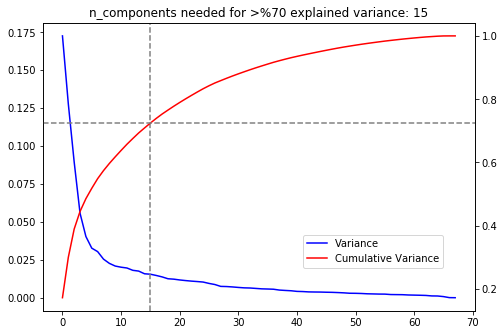

In [79]:
# Investigate the variance accounted for by each principal component.
# Number of components required to maintain %70 variance:
n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>0.7)[0]+1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1],True)
ax2 = ax.twinx()
ax.plot(pca.explained_variance_ratio_, label='Variance',color = 'blue')
ax2.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance',color = 'red');
ax.set_title('n_components needed for >%70 explained variance: {}'.format(n_components));
ax.axvline(n_components, linestyle='dashed', color='grey')
ax2.axhline(np.cumsum(pca.explained_variance_ratio_)[n_components], linestyle='dashed', color='grey')
fig.legend(loc=(0.6,0.2));

In [80]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=15, random_state=10)
azdias_lower_missing_pca = pca.fit_transform(azdias_lower_missing)

In [81]:
pca.explained_variance_ratio_.sum()

0.70887874119534988

### Discussion 2.2: Perform Dimensionality Reduction

70% cumulative explained variance and found out we need 15 principal components.

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [82]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
def comp_analysis(azdias_missing_low):
    feature_map = pd.Series(azdias_lower_missing.columns, range(len(azdias_lower_missing.columns)))
    components = {}
    for ix in range(pca.components_.shape[0]):
        components[ix] = [(feature_map[a],b) for a,b in sorted(enumerate(pca.components_[ix]),key=lambda x:x[1],reverse=True)]
    return pd.DataFrame(components)

In [83]:
# Top 10 positive components
components = comp_analysis(azdias_lower_missing)
components[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(PLZ8_ANTG3, 0.22490530321)","(ALTERSKATEGORIE_GROB, 0.272137197739)","(SEMIO_VERT, 0.346604826802)","(GREEN_AVANTGARDE, 0.350985008758)","(LP_LEBENSPHASE_GROB, 0.356792985117)","(KBA13_ANZAHL_PKW, 0.457279140296)","(KBA05_ANTG4, 0.381878368382)","(REGIOTYP, 0.364477973602)","(SEMIO_MAT, 0.290995342382)","(VERS_TYP, 0.351252940847)","(ARBEIT, 0.341022452251)","(SEMIO_LUST, 0.269308619601)","(KBA05_GBZ, 0.29872219507)","(ANZ_TITEL, 0.60375991662)","(CAMEO_INTL_2015_ones, 0.239274621568)"
1,"(PLZ8_ANTG4, 0.21919883255)","(FINANZ_VORSORGER, 0.244907465593)","(SEMIO_SOZ, 0.262594370572)","(TREND, 0.350159155695)","(LP_LEBENSPHASE_FEIN, 0.34406154309)","(PLZ8_HHZ, 0.442377288295)","(ANZ_HAUSHALTE_AKTIV, 0.337570519521)","(KKK, 0.344420478568)","(SEMIO_RAT, 0.284784772907)","(HEALTH_TYP, 0.329335324811)","(FINANZ_HAUSBAUER, 0.315293452475)","(FINANZ_UNAUFFAELLIGER, 0.263235398082)","(KBA05_ANTG1, 0.243890552511)","(ANZ_HH_TITEL, 0.58732141387)","(OST_WEST_KZ, 0.239033263783)"
2,"(PLZ8_BAUMAX, 0.214619530848)","(SEMIO_ERL, 0.235271411023)","(SEMIO_FAM, 0.250280829225)","(EWDICHTE, 0.248156280917)","(ANZ_PERSONEN, 0.329865160532)","(PLZ8_GBZ, 0.294706853973)","(ANZ_HH_TITEL, 0.250608114756)","(VERS_TYP, 0.280572675781)","(SEMIO_TRADV, 0.226968873719)","(KBA05_ANTG2, 0.203657494377)","(OST_WEST_KZ, 0.314745030141)","(REGIOTYP, 0.185177043805)","(MOBI_REGIO, 0.243746570548)","(MIN_GEBAEUDEJAHR, 0.264760263573)","(KBA05_ANTG2, 0.184038924508)"
3,"(CAMEO_INTL_2015_tens, 0.201581355212)","(SEMIO_LUST, 0.190627154512)","(SEMIO_KULT, 0.236337813073)","(ORTSGR_KLS9, 0.247076889921)","(KKK, 0.234378611512)","(LP_LEBENSPHASE_GROB, 0.2470004137)","(OST_WEST_KZ, 0.142876023951)","(HEALTH_TYP, 0.257946937006)","(SEMIO_PFLICHT, 0.220133566007)","(WOHNDAUER_2008, 0.177815778573)","(CAMEO_INTL_2015_ones, 0.227486075833)","(FINANZ_SPARER, 0.163580146392)","(WOHNLAGE, 0.2366435873)","(KBA05_ANTG2, 0.17436287878)","(KBA05_GBZ, 0.163243379512)"
4,"(ORTSGR_KLS9, 0.197266149922)","(RETOURTYP_BK_S, 0.164569303997)","(FINANZ_MINIMALIST, 0.160906334801)","(LP_LEBENSPHASE_FEIN, 0.215269636466)","(OST_WEST_KZ, 0.187175424266)","(ANZ_PERSONEN, 0.239518212568)","(WOHNLAGE, 0.119673298163)","(KBA05_ANTG4, 0.214303764513)","(WOHNDAUER_2008, 0.214419116908)","(FINANZ_VORSORGER, 0.144050448492)","(RELAT_AB, 0.198787578194)","(ANZ_HH_TITEL, 0.149968956253)","(PLZ8_BAUMAX, 0.236091182967)","(ANZ_HAUSHALTE_AKTIV, 0.132364600315)","(FINANZ_HAUSBAUER, 0.143279288271)"
5,"(HH_EINKOMMEN_SCORE, 0.197249888487)","(W_KEIT_KIND_HH, 0.116967046655)","(RETOURTYP_BK_S, 0.105832673538)","(LP_LEBENSPHASE_GROB, 0.211132377087)","(REGIOTYP, 0.179126742202)","(LP_LEBENSPHASE_FEIN, 0.234352484115)","(PLZ8_BAUMAX, 0.100543801598)","(ANZ_HAUSHALTE_AKTIV, 0.171628499897)","(SEMIO_REL, 0.209901217713)","(ANZ_HH_TITEL, 0.12435454902)","(ANZ_HH_TITEL, 0.155107965092)","(TREND, 0.149186072615)","(OST_WEST_KZ, 0.181115471204)","(RELAT_AB, 0.124709002453)","(ONLINE_AFFINITAET, 0.135320312935)"
6,"(EWDICHTE, 0.195014434329)","(SEMIO_KRIT, 0.111573183131)","(FINANZ_VORSORGER, 0.0995462668899)","(ANZ_PERSONEN, 0.191671977229)","(ONLINE_AFFINITAET, 0.147027697365)","(KBA05_ANTG4, 0.142789205157)","(PLZ8_ANTG4, 0.0893557816742)","(PLZ8_ANTG1, 0.160731995637)","(FINANZ_VORSORGER, 0.188419162046)","(RETOURTYP_BK_S, 0.119673815254)","(VERS_TYP, 0.150081268461)","(GREEN_AVANTGARDE, 0.135606632726)","(PLZ8_HHZ, 0.171161991802)","(ARBEIT, 0.102245652829)","(MOBI_REGIO, 0.125593219847)"
7,"(FINANZ_HAUSBAUER, 0.163983620944)","(SEMIO_KAEM, 0.103009318393)","(W_KEIT_KIND_HH, 0.0862234201465)","(ONLINE_AFFINITAET, 0.169272180531)","(ARBEIT, 0.114186069262)","(ANZ_HAUSHALTE_AKTIV, 0.117734659302)","(ANZ_TITEL, 0.0742148984965)","(ORTSGR_KLS9, 0.158522120694)","(RETOURTYP_BK_S, 0.146303134944)","(SEMIO_DOM, 0.108538018008)","(GEBAEUDETYP_RASTER, 0.148326992783)","(ALTERSKATEGORIE_GROB, 0.131840075345)","(PLZ8_ANTG4, 0.167038100567)","(PLZ8_ANTG2, 0.0937098247996)","(ORTSGR_

In [84]:
# Top 10 negative components
components[-10:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
58,"(LP_LEBENSPHASE_GROB, -0.129890149567)","(SEMIO_RAT, -0.182138595745)","(FINANZ_UNAUFFAELLIGER, -0.0972092626604)","(CAMEO_INTL_2015_tens, -0.0993095797112)","(PLZ8_ANTG1, -0.0664427393853)","(KONSUMNAEHE, -0.0936486835122)","(KBA05_GBZ, -0.113263456026)","(WOHNLAGE, -0.0911524042282)","(KBA05_ANTG3, -0.0938940221088)","(ALTERSKATEGORIE_GROB, -0.112344225617)","(SEMIO_RAT, -0.0840667702168)","(SEMIO_TRADV, -0.149935176507)","(FINANZ_UNAUFFAELLIGER, -0.0716592413888)","(FINANZ_SPARER, -0.0375886244066)","(PLZ8_ANTG2, -0.114311620703)"
59,"(LP_LEBENSPHASE_FEIN, -0.144395385242)","(SEMIO_FAM, -0.18925992359)","(DECADE, -0.105497844678)","(FINANZ_HAUSBAUER, -0.105025859897)","(PLZ8_ANTG2, -0.073845109581)","(TREND, -0.110565742691)","(PLZ8_GBZ, -0.125248759135)","(PLZ8_ANTG3, -0.125512513319)","(ALTERSKATEGORIE_GROB, -0.109534488002)","(ONLINE_AFFINITAET, -0.116546697988)","(PLZ8_ANTG2, -0.0933191445964)","(SEMIO_DOM, -0.151218442768)","(ORTSGR_KLS9, -0.0858092755977)","(WOHNLAGE, -0.0408060986604)","(CAMEO_INTL_2015_tens, -0.179784306615)"
60,"(INNENSTADT, -0.163861588591)","(FINANZ_ANLEGER, -0.213234163611)","(FINANZ_SPARER, -0.105961829384)","(KONSUMNAEHE, -0.125042000084)","(FINANZ_UNAUFFAELLIGER, -0.0823947623638)","(GREEN_AVANTGARDE, -0.113401809037)","(ARBEIT, -0.170248037506)","(INNENSTADT, -0.134471354489)","(FINANZ_ANLEGER, -0.124824991703)","(GEBAEUDETYP_RASTER, -0.136189158029)","(WOHNLAGE, -0.0964718391612)","(RETOURTYP_BK_S, -0.153636148585)","(EWDICHTE, -0.0881345273859)","(W_KEIT_KIND_HH, -0.0493871692879)","(GEBAEUDETYP_RASTER, -0.182993629155)"
61,"(KONSUMNAEHE, -0.167152378866)","(SEMIO_KULT, -0.223628630707)","(SEMIO_ERL, -0.177972564339)","(REGIOTYP, -0.152858604871)","(GREEN_AVANTGARDE, -0.113790527732)","(OST_WEST_KZ, -0.126613961462)","(RELAT_AB, -0.203415942479)","(FINANZ_HAUSBAUER, -0.136223849578)","(MIN_GEBAEUDEJAHR, -0.154476407248)","(REGIOTYP, -0.156065099115)","(SEMIO_KRIT, -0.115984194883)","(PLZ8_HHZ, -0.16198177588)","(KBA05_ANTG4, -0.0887188728279)","(SEMIO_SOZ, -0.0565866948558)","(KBA05_ANTG4, -0.185623926007)"
62,"(PLZ8_GBZ, -0.167250745886)","(FINANZ_UNAUFFAELLIGER, -0.23424211894)","(FINANZ_ANLEGER, -0.1881988286)","(W_KEIT_KIND_HH, -0.156999144518)","(TREND, -0.116058051109)","(KBA05_ANTG1, -0.129182006418)","(GEBAEUDETYP_RASTER, -0.207462123086)","(BALLRAUM, -0.16393507057)","(ONLINE_AFFINITAET, -0.159093521498)","(KBA13_ANZAHL_PKW, -0.16258587875)","(PLZ8_BAUMAX, -0.116786025106)","(VERS_TYP, -0.181705703314)","(CAMEO_INTL_2015_ones, -0.196956740603)","(GREEN_AVANTGARDE, -0.0623032796041)","(WOHNDAUER_2008, -0.190925239554)"
63,"(FINANZ_MINIMALIST, -0.199707684519)","(SEMIO_TRADV, -0.239774942258)","(SEMIO_RAT, -0.216406707465)","(KKK, -0.201776365591)","(KBA05_ANTG2, -0.120126785882)","(RELAT_AB, -0.138160645087)","(KBA05_ANTG3, -0.212299529469)","(OST_WEST_KZ, -0.165390121766)","(FINANZ_UNAUFFAELLIGER, -0.161090847437)","(KKK, -0.174486249335)","(REGIOTYP, -0.146595579342)","(FINANZ_MINIMALIST, -0.183908701239)","(MIN_GEBAEUDEJAHR, -0.203303874093)","(TREND, -0.0653798533348)","(RELAT_AB, -0.259390873201)"
64,"(KBA05_GBZ, -0.212279456179)","(SEMIO_PFLICHT, -0.240008579398)","(SEMIO_KRIT, -0.277440301233)","(INNENSTADT, -0.204513862632)","(W_KEIT_KIND_HH, -0.259091234454)","(MOBI_REGIO, -0.150172618787)","(PLZ8_ANTG2, -0.249299911396)","(PLZ8_ANTG2, -0.184473515372)","(FINANZ_SPARER, -0.165343759314)","(PLZ8_HHZ, -0.214243843934)","(SEMIO_MAT, -0.151166791759)","(MIN_GEBAEUDEJAHR, -0.190539589876)","(KONSUMNAEHE, -0.205543295489)","(SEMIO_LUST, -0.0703195779924)","(INNENSTADT, -0.302602974414)"
65,"(KBA05_ANTG1, -0.219813450831)","(FINANZ_SPARER, -0.252193662544)","(SEMIO_DOM, -0.313978015949)","(BALLRAUM, -0.212117493675)","(PLZ8_GBZ, -0.286455385358)","(KBA05_GBZ, -0.17168146911)","(KKK, -0.267244848404)","(KBA05_ANTG3, -0.221000700843)","(DECADE, -0.216585288155)","(ARBEIT, -0.239041168811)","(FINANZ_MINIMALIST, -0.171304487192)","(ARBEIT, -0.2

In [85]:
components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"(PLZ8_ANTG3, 0.22490530321)","(ALTERSKATEGORIE_GROB, 0.272137197739)","(SEMIO_VERT, 0.346604826802)","(GREEN_AVANTGARDE, 0.350985008758)","(LP_LEBENSPHASE_GROB, 0.356792985117)","(KBA13_ANZAHL_PKW, 0.457279140296)","(KBA05_ANTG4, 0.381878368382)","(REGIOTYP, 0.364477973602)","(SEMIO_MAT, 0.290995342382)","(VERS_TYP, 0.351252940847)","(ARBEIT, 0.341022452251)","(SEMIO_LUST, 0.269308619601)","(KBA05_GBZ, 0.29872219507)","(ANZ_TITEL, 0.60375991662)","(CAMEO_INTL_2015_ones, 0.239274621568)"
1,"(PLZ8_ANTG4, 0.21919883255)","(FINANZ_VORSORGER, 0.244907465593)","(SEMIO_SOZ, 0.262594370572)","(TREND, 0.350159155695)","(LP_LEBENSPHASE_FEIN, 0.34406154309)","(PLZ8_HHZ, 0.442377288295)","(ANZ_HAUSHALTE_AKTIV, 0.337570519521)","(KKK, 0.344420478568)","(SEMIO_RAT, 0.284784772907)","(HEALTH_TYP, 0.329335324811)","(FINANZ_HAUSBAUER, 0.315293452475)","(FINANZ_UNAUFFAELLIGER, 0.263235398082)","(KBA05_ANTG1, 0.243890552511)","(ANZ_HH_TITEL, 0.58732141387)","(OST_WEST_KZ, 0.239033263783)"
2,"(PLZ8_BAUMAX, 0.214619530848)","(SEMIO_ERL, 0.235271411023)","(SEMIO_FAM, 0.250280829225)","(EWDICHTE, 0.248156280917)","(ANZ_PERSONEN, 0.329865160532)","(PLZ8_GBZ, 0.294706853973)","(ANZ_HH_TITEL, 0.250608114756)","(VERS_TYP, 0.280572675781)","(SEMIO_TRADV, 0.226968873719)","(KBA05_ANTG2, 0.203657494377)","(OST_WEST_KZ, 0.314745030141)","(REGIOTYP, 0.185177043805)","(MOBI_REGIO, 0.243746570548)","(MIN_GEBAEUDEJAHR, 0.264760263573)","(KBA05_ANTG2, 0.184038924508)"
3,"(CAMEO_INTL_2015_tens, 0.201581355212)","(SEMIO_LUST, 0.190627154512)","(SEMIO_KULT, 0.236337813073)","(ORTSGR_KLS9, 0.247076889921)","(KKK, 0.234378611512)","(LP_LEBENSPHASE_GROB, 0.2470004137)","(OST_WEST_KZ, 0.142876023951)","(HEALTH_TYP, 0.257946937006)","(SEMIO_PFLICHT, 0.220133566007)","(WOHNDAUER_2008, 0.177815778573)","(CAMEO_INTL_2015_ones, 0.227486075833)","(FINANZ_SPARER, 0.163580146392)","(WOHNLAGE, 0.2366435873)","(KBA05_ANTG2, 0.17436287878)","(KBA05_GBZ, 0.163243379512)"
4,"(ORTSGR_KLS9, 0.197266149922)","(RETOURTYP_BK_S, 0.164569303997)","(FINANZ_MINIMALIST, 0.160906334801)","(LP_LEBENSPHASE_FEIN, 0.215269636466)","(OST_WEST_KZ, 0.187175424266)","(ANZ_PERSONEN, 0.239518212568)","(WOHNLAGE, 0.119673298163)","(KBA05_ANTG4, 0.214303764513)","(WOHNDAUER_2008, 0.214419116908)","(FINANZ_VORSORGER, 0.144050448492)","(RELAT_AB, 0.198787578194)","(ANZ_HH_TITEL, 0.149968956253)","(PLZ8_BAUMAX, 0.236091182967)","(ANZ_HAUSHALTE_AKTIV, 0.132364600315)","(FINANZ_HAUSBAUER, 0.143279288271)"
5,"(HH_EINKOMMEN_SCORE, 0.197249888487)","(W_KEIT_KIND_HH, 0.116967046655)","(RETOURTYP_BK_S, 0.105832673538)","(LP_LEBENSPHASE_GROB, 0.211132377087)","(REGIOTYP, 0.179126742202)","(LP_LEBENSPHASE_FEIN, 0.234352484115)","(PLZ8_BAUMAX, 0.100543801598)","(ANZ_HAUSHALTE_AKTIV, 0.171628499897)","(SEMIO_REL, 0.209901217713)","(ANZ_HH_TITEL, 0.12435454902)","(ANZ_HH_TITEL, 0.155107965092)","(TREND, 0.149186072615)","(OST_WEST_KZ, 0.181115471204)","(RELAT_AB, 0.124709002453)","(ONLINE_AFFINITAET, 0.135320312935)"
6,"(EWDICHTE, 0.195014434329)","(SEMIO_KRIT, 0.111573183131)","(FINANZ_VORSORGER, 0.0995462668899)","(ANZ_PERSONEN, 0.191671977229)","(ONLINE_AFFINITAET, 0.147027697365)","(KBA05_ANTG4, 0.142789205157)","(PLZ8_ANTG4, 0.0893557816742)","(PLZ8_ANTG1, 0.160731995637)","(FINANZ_VORSORGER, 0.188419162046)","(RETOURTYP_BK_S, 0.119673815254)","(VERS_TYP, 0.150081268461)","(GREEN_AVANTGARDE, 0.135606632726)","(PLZ8_HHZ, 0.171161991802)","(ARBEIT, 0.102245652829)","(MOBI_REGIO, 0.125593219847)"
7,"(FINANZ_HAUSBAUER, 0.163983620944)","(SEMIO_KAEM, 0.103009318393)","(W_KEIT_KIND_HH, 0.0862234201465)","(ONLINE_AFFINITAET, 0.169272180531)","(ARBEIT, 0.114186069262)","(ANZ_HAUSHALTE_AKTIV, 0.117734659302)","(ANZ_TITEL, 0.0742148984965)","(ORTSGR_KLS9, 0.158522120694)","(RETOURTYP_BK_S, 0.146303134944)","(SEMIO_DOM, 0.108538018008)","(GEBAEUDETYP_RASTER, 0.148326992783)","(ALTERSKATEGORIE_GROB, 0.131840075345)","(PLZ8_ANTG4, 0.167038100567)","(PLZ8_ANTG2, 0.0937098247996)","(ORTSGR_

In [86]:
def comp(components,compnum): 
    print('Top positive components {}\n\n'.format(compnum), components.loc[:8,compnum])
    print('Top negative components {}\n\n'.format(compnum), components.loc[components.shape[0]-8:,compnum].head(8))

# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
components.loc[:,:].head(8)
# 3rd Component
for num in range(3):
    comp(components,num)

Top positive components 0

 0               (PLZ8_ANTG3, 0.22490530321)
1               (PLZ8_ANTG4, 0.21919883255)
2             (PLZ8_BAUMAX, 0.214619530848)
3    (CAMEO_INTL_2015_tens, 0.201581355212)
4             (ORTSGR_KLS9, 0.197266149922)
5      (HH_EINKOMMEN_SCORE, 0.197249888487)
6                (EWDICHTE, 0.195014434329)
7        (FINANZ_HAUSBAUER, 0.163983620944)
8              (PLZ8_ANTG2, 0.152555730277)
Name: 0, dtype: object
Top negative components 0

 60           (INNENSTADT, -0.163861588591)
61          (KONSUMNAEHE, -0.167152378866)
62             (PLZ8_GBZ, -0.167250745886)
63    (FINANZ_MINIMALIST, -0.199707684519)
64            (KBA05_GBZ, -0.212279456179)
65          (KBA05_ANTG1, -0.219813450831)
66           (PLZ8_ANTG1, -0.224503135508)
67           (MOBI_REGIO, -0.236669867945)
Name: 0, dtype: object
Top positive components 1

 0    (ALTERSKATEGORIE_GROB, 0.272137197739)
1        (FINANZ_VORSORGER, 0.244907465593)
2               (SEMIO_ERL, 0.235271411023

### Discussion 2.3: Interpret Principal Components

#### Component 1:  PLZ8_ANTG3 (With highest positive impact)
Number of 6-10 family houses in the PLZ8 region
- -1: unknown
-  0: no 6-10 family homes
-  1: lower share of 6-10 family homes
-  2: average share of 6-10 family homes
-  3: high share of 6-10 family homes

#### Component 1:  MOBI_REGIO (With highest negative impact)
Movement patterns
- 1: very high movement
- 2: high movement
- 3: middle movement
- 4: low movement
- 5: very low movement
- 6: none

#### Component 2:  ALTERSKATEGORIE_GROB (With highest positive impact)
Estimated age based on given name analysis
- -1: unknown (missing)
-  0: unknown (cannot be determined)
-  1: < 30 years old
-  2: 30 - 45 years old
-  3: 46 - 60 years old
-  4: > 60 years old
-  9: uniformly distributed

#### Component 2:  SEMIO_REL (With highest negative impact)
Personality typology, for each dimension:
- -1: unknown
-  1: highest affinity
-  2: very high affinity
-  3: high affinity
-  4: average affinity
-  5: low affinity
-  6: very low affinity
-  7: lowest affinity
-  9: unknown

Dimension translations:
- SOZ: socially-minded
- FAM: family-minded
- REL: religious
- MAT: materialistic
- VERT: dreamful
- LUST: sensual-minded
- ERL: event-oriented
- KULT: cultural-minded
- RAT: rational
- KRIT: critical-minded
- DOM: dominant-minded
- KAEM: combative attitude
- PFLICHT: dutiful
- TRADV: tradional-minded

#### Component 3:  ALTERSKATEGORIE_GROB (With highest positive impact)
Personality typology, for each dimension:
- -1: unknown
-  1: highest affinity
-  2: very high affinity
-  3: high affinity
-  4: average affinity
-  5: low affinity
-  6: very low affinity
-  7: lowest affinity
-  9: unknown

Dimension translations:
- SOZ: socially-minded
- FAM: family-minded
- REL: religious
- MAT: materialistic
- VERT: dreamful
- LUST: sensual-minded
- ERL: event-oriented
- KULT: cultural-minded
- RAT: rational
- KRIT: critical-minded
- DOM: dominant-minded
- KAEM: combative attitude
- PFLICHT: dutiful
- TRADV: tradional-minded

#### Component 3:  ANREDE_KZ (With highest negative impact)
Gender
- -1: unknown (missing)
-  0: unknown (cannot be determined)
-  1: male
-  2: female


## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [87]:
azdias_lower_missing.columns

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'FINANZ_MINIMALIST',
       'FINANZ_SPARER', 'FINANZ_VORSORGER', 'FINANZ_ANLEGER',
       'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER', 'GREEN_AVANTGARDE',
       'HEALTH_TYP', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB',
       'RETOURTYP_BK_S', 'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT',
       'SEMIO_VERT', 'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT',
       'SEMIO_KRIT', 'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SOHO_KZ', 'VERS_TYP', 'ANZ_PERSONEN', 'ANZ_TITEL',
       'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'KBA05_ANTG1',
       'KBA05_ANTG2', 'KBA05_ANTG3', 'KBA05_ANTG4', 'KBA05_GBZ', 'BALLRAUM',
       'EWDICHTE', 'INNENSTADT', 'GEBAEUDETYP_RASTER', 'KKK', 'MOBI_REGIO',
       'ONLINE_AFFINITAET', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'PLZ8_ANTG1',
       'PLZ8_ANTG2', 

In [89]:
from sklearn.cluster import KMeans, MiniBatchKMeans

# Over a number of different cluster counts...
kmeans_scores = []
for i in range(2,50,1):

    #run k-means clustering on the data and...
    kmeans = MiniBatchKMeans(i)
    kmeans.fit(azdias_lower_missing_pca)
    
    #compute the average within-cluster distances.
    print(i,kmeans.score(azdias_lower_missing_pca))
    kmeans_scores.append(kmeans.score(azdias_lower_missing_pca))   

2 -31453821.9455
3 -29203180.0689
4 -26776053.7918
5 -25072803.4922
6 -24062951.0562
7 -23066043.9318
8 -21700358.4852
9 -21465386.4934
10 -20221813.0415
11 -20894061.3313
12 -19933095.4431
13 -19790336.637
14 -18883166.9478
15 -19182915.6809
16 -18031904.9979
17 -17879702.569
18 -18803296.8329
19 -17637205.0567
20 -18177053.5841
21 -16974744.2709
22 -17650586.1926
23 -17132104.0383
24 -16361460.9795
25 -16327018.4944
26 -16261675.863
27 -16203785.6552
28 -15910700.1134
29 -15778737.5935
30 -15563642.7501
31 -15668407.184
32 -16684871.8287
33 -15243474.4682
34 -15084995.3836
35 -15326587.9536
36 -14984113.0364
37 -15868982.8833
38 -14770856.0108
39 -14711983.2172
40 -14628782.1741
41 -14666288.3156
42 -14472364.5437
43 -14446534.5392
44 -14257329.1403
45 -14268803.5384
46 -14135988.2122
47 -13997801.4823
48 -14454777.681
49 -13918430.8117


In [91]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(15, random_state=10)
clusters_data = kmeans.fit_predict(azdias_lower_missing_pca)

### Discussion 3.1: Apply Clustering to General Population
MiniBatchKmeans was used since there was a need to iterate through multiple clusters..There is a marginal drop in Kmeans distance after 15 clusters, hence 15 was chosen

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [92]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter=';')

In [93]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Data columns (total 85 columns):
AGER_TYP                 191652 non-null int64
ALTERSKATEGORIE_GROB     191652 non-null int64
ANREDE_KZ                191652 non-null int64
CJT_GESAMTTYP            188439 non-null float64
FINANZ_MINIMALIST        191652 non-null int64
FINANZ_SPARER            191652 non-null int64
FINANZ_VORSORGER         191652 non-null int64
FINANZ_ANLEGER           191652 non-null int64
FINANZ_UNAUFFAELLIGER    191652 non-null int64
FINANZ_HAUSBAUER         191652 non-null int64
FINANZTYP                191652 non-null int64
GEBURTSJAHR              191652 non-null int64
GFK_URLAUBERTYP          188439 non-null float64
GREEN_AVANTGARDE         191652 non-null int64
HEALTH_TYP               191652 non-null int64
LP_LEBENSPHASE_FEIN      188439 non-null float64
LP_LEBENSPHASE_GROB      188439 non-null float64
LP_FAMILIE_FEIN          188439 non-null float64
LP_FAMILIE_GROB          188439 n

In [94]:
# PRe-preocess customer dataframe
customers = clean_data(customers)

In [95]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141780 entries, 0 to 191651
Data columns (total 61 columns):
ALTERSKATEGORIE_GROB     141547 non-null float64
ANREDE_KZ                141780 non-null int64
FINANZ_MINIMALIST        141780 non-null int64
FINANZ_SPARER            141780 non-null int64
FINANZ_VORSORGER         141780 non-null int64
FINANZ_ANLEGER           141780 non-null int64
FINANZ_UNAUFFAELLIGER    141780 non-null int64
FINANZ_HAUSBAUER         141780 non-null int64
GREEN_AVANTGARDE         141780 non-null int64
HEALTH_TYP               139441 non-null float64
RETOURTYP_BK_S           138656 non-null float64
SEMIO_SOZ                141780 non-null int64
SEMIO_FAM                141780 non-null int64
SEMIO_REL                141780 non-null int64
SEMIO_MAT                141780 non-null int64
SEMIO_VERT               141780 non-null int64
SEMIO_LUST               141780 non-null int64
SEMIO_ERL                141780 non-null int64
SEMIO_KULT               141780 non-n

In [96]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
imputer = Imputer()
customers = pd.DataFrame(imputer.fit_transform(customers), columns = customers.columns)
scaler = StandardScaler()
customers = pd.DataFrame(scaler.fit_transform(customers), columns = customers.columns)

In [97]:
customers.shape

(141780, 61)

In [98]:
customers.head(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,OST_WEST_KZ_O,OST_WEST_KZ_W
0,0.703041,-0.702880,0.723117,-0.51708,0.516343,-0.600879,0.136389,-0.552858,1.007377,-1.255148,...,0.322588,-0.443874,-0.856346,1.477252,1.380389,-1.810832,-1.447859,-1.338621,-0.294892,0.295669
1,0.703041,1.422717,0.723117,-0.51708,0.516343,-0.600879,2.179420,0.966158,1.007377,0.049621,...,0.322588,1.839330,0.729660,-0.687050,-1.625231,0.174900,-0.055472,0.072299,-0.294892,0.295669
2,0.703041,-0.702880,0.723117,-0.51708,0.516343,0.396202,-0.885126,-0.552858,-0.992677,0.049621,...,-0.878903,-0.443874,-0.856346,-0.687050,0.378516,-1.810832,-0.983730,-1.338621,-0.294892,0.295669
3,-0.667364,-0.702880,-1.241443,-0.51708,-0.665103,2.390364,3.200935,-0.552858,-0.992677,1.354390,...,1.524080,0.697728,0.729660,-0.687050,-0.623358,0.174900,-0.055472,-1.338621,-0.294892,0.295669
4,-0.667364,-0.702880,0.723117,-0.51708,0.516343,-0.600879,0.136389,0.206650,1.007377,1.354390,...,0.322588,0.697728,0.729660,1.477252,1.380389,0.174900,0.872787,1.483219,-0.294892,0.295669


In [103]:
# Apply the fitted pca and kmeans on the customer data
pca = PCA()
cust_pca = pca.fit_transform(customers)

clusters_cust = kmeans.fit_predict(cust_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

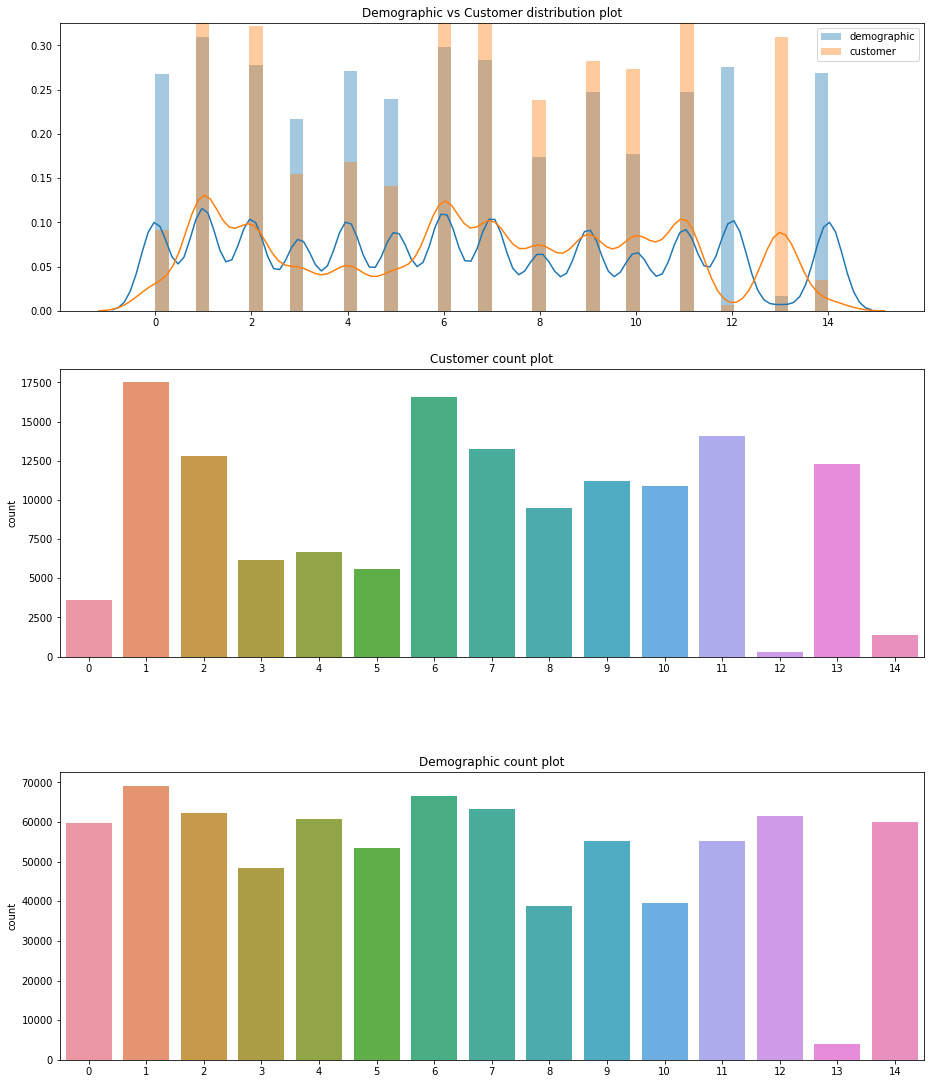

In [128]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

fig = plt.figure()
ax=fig.add_axes([0,3.6,2,1], title='Demographic vs Customer distribution plot')
ax1=fig.add_axes([0,1,2,1], title='Demographic count plot')
ax2=fig.add_axes([0,2.4,2,1], title='Customer count plot')
sns.distplot(clusters_data, label='demographic',ax=ax)
sns.distplot(clusters_cust, label='customer', ax=ax)
sns.countplot(clusters_data, label='demographic', ax=ax1)
sns.countplot(clusters_cust, label='customer', ax=ax2)
ax.legend();

In [131]:
cust_df = pd.DataFrame(clusters_cust,columns=['Cluster']).reset_index().groupby('Cluster').count()/len(clusters_cust)*100

azdias_df = pd.DataFrame(clusters_data, columns=['Cluster']).reset_index().groupby('Cluster').count()/len(clusters_data)*100

diff = (cust_df-azdias_df)
diff.rename_axis({'index':'DiffPerc'}, axis=1, inplace=True)

cust_df.rename_axis({'index':'CustPerc'}, axis=1, inplace=True)
azdias_df.rename_axis({'index':'PopPerc'}, axis=1, inplace=True)
diff = diff.join(cust_df).join(azdias_df).sort_values('DiffPerc',ascending=False)
diff.fillna(0, inplace=True)
diff

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  if __name__ == '__main__':


,DiffPerc,CustPerc,PopPerc
Cluster,,,
13,8.177842,8.664833,0.486991
1,3.673441,12.347299,8.673857
6,3.333183,11.677952,8.344769
11,3.014740,9.938637,6.923897
10,2.709452,7.662576,4.953124
8,1.817596,6.679362,4.861766
7,1.415346,9.344054,7.928708
2,1.231651,9.023134,7.791484
9,0.969120,7.903795,6.934675


In [133]:
# What kind of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# Cluster center specs can be found below:

cluster_specs = pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(kmeans.cluster_centers_)), columns=customers.columns)
cluster_specs

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,OST_WEST_KZ_O,OST_WEST_KZ_W
0,2.067497,1.584713,1.943433,3.809051,2.484547,3.315949,3.595751,3.485651,0.198400,2.307899,...,3.320763,2.314200,1.217537,3.797277,2.824024,3.380114,7.005980,3.723666,1.730132e-01,8.264349e-01
1,3.998138,1.000000,4.886902,1.078826,4.902725,1.060262,1.696864,2.251785,0.823328,1.101601,...,2.633531,1.235577,0.415754,3.720233,3.899448,2.609408,4.770751,2.669649,3.113040e-02,9.677272e-01
2,3.660322,2.000000,4.499258,1.180539,4.793122,1.319734,1.795233,2.880109,0.858695,1.918060,...,2.764559,1.388133,0.485687,3.750866,3.818950,3.071224,5.813094,3.239164,3.626417e-02,9.635014e-01
3,3.587808,1.511526,2.820130,1.281169,4.804058,1.304221,1.539610,4.485390,0.077273,1.946016,...,3.110173,2.190097,1.350954,3.824629,2.760357,3.100707,6.673505,3.751698,1.006494e-02,9.899351e-01
4,2.481309,1.290694,3.845601,3.289048,2.473519,3.544434,3.810293,1.547127,0.422501,2.135117,...,2.411991,0.989728,0.288663,3.531276,3.895841,2.470503,4.029769,2.362907,1.105625e-01,8.870437e-01
5,3.575698,1.479274,3.178082,1.370219,4.312934,1.828856,1.147838,4.531578,0.205124,1.927214,...,3.064160,2.473906,1.339793,3.592641,2.441404,4.015122,7.003558,3.215086,1.000000e+00,8.881784e-16
6,3.986327,1.000000,4.893634,1.125997,4.866695,1.350930,1.612406,2.162418,0.342232,1.761774,...,2.203487,0.712342,0.138668,3.363353,3.916156,2.190173,3.352300,2.007489,3.841508e-02,9.615849e-01
7,3.559153,2.000000,4.290836,1.428895,4.555782,2.505963,1.803065,2.620924,0.306310,1.938458,...,2.252490,0.758515,0.157310,3.400983,3.919001,2.212767,3.248095,2.046947,7.759662e-02,9.218750e-01
8,3.584461,2.000000,2.768321,1.342239,4.789018,1.517635,1.722175,4.459662,0.202746,1.838528,...,3.456753,2.135444,0.956776,3.759123,3.130144,3.252017,6.466211,3.678215,-1.804112e-16,1.000000e+00
9,2.663752,1.068642,4.804784,1.389896,4.582612,1.258145,1.955101,1.976792,0.749799,2.285833,...,2.711614,1.316630,0.461164,3.772791,3.885205,2.767023,5.188404,2.832648,4.123895e-02,9.581362e-01


### Discussion 3.3: Compare Customer Data to Demographics Data

From the plot showing the proportion of customer data and population data, 13, 1 and 6 clusters are significantly higher in the customer data relative to the demographic/population data. 
These clusters represent the following:
#### ALTERSKATEGORIE_GROB
Estimated age based on given name analysis
- -1: unknown (missing)
-  0: unknown (cannot be determined)
-  1: < 30 years old
-  2: 30 - 45 years old
-  3: 46 - 60 years old
-  4: > 60 years old
-  9: uniformly distributed

#### ANREDE_KZ
Gender
- -1: unknown (missing)
-  0: unknown (cannot be determined)
-  1: male
-  2: female

#### FINANZ_MINIMALIST, FINANZ_SPARER, FINANZ_VORSORGER, FINANZ_ANLEGER, FINANZ_UNAUFFAELLIGER, FINANZ_HAUSBAUER
Financial typology, for each dimension:
- -1: unknown
-  1: very high
-  2: high
-  3: average
-  4: low
-  5: very low


References


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.